# Modelling 
### Jumbo data

<hr>

### Import the libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

### Load the data

In [2]:
# df = pd.read_csv("/Users/deyna.baeva/Documents/code/data/jumbo-lemmatized.csv")
df = pd.read_csv("/Users/deyna.baeva/Documents/code/data/lemmatized_dlp.csv")

In [15]:
# df.drop(df.columns[df.columns.str.contains("Unnamed", case=False)], axis=1, inplace=True)

In [3]:
df.head()

,descr,clean_text,clean_text_masks,stopw_descr,lemmatized
0,Na aanleiding van mijn telefonische contact ov...,na aanleiding van mijn telefonische contact ov...,na aanleiding van mijn telefonische contact ov...,aanleiding telefonische contact [PERSON_NAME] ...,aanleiding telefonisch contact [PERSON_NAME] b...
1,Ik kon mijn bestel tijd niet meer wijzigen maa...,ik kon mijn bestel tijd niet meer wijzigen maa...,ik kon mijn bestel tijd niet meer wijzigen maa...,bestel tijd wijzigen boodschappen tuin gezet t...,bestel tijd wijzig boodschappen tuin zetten tu...
2,goede middag hoe kan ik mijn punten van de kwi...,goede middag hoe kan ik mijn punten van de kwi...,goede middag hoe kan ik mijn punten van de kwi...,goede middag punten kwijtgeraakte overzetten n...,goed middag punt kwijtgeraken overzetten nieuw...
3,"[PERSON_NAME], je chat met [PERSON_NAME]. O je...",personname je chat met personname o jee mijn e...,[PERSON_NAME] je chat met [PERSON_NAME] o jee ...,[PERSON_NAME] chat [PERSON_NAME] jee excuses n...,[PERSON_NAME] chat [PERSON_NAME] jee excuus na...
4,"[PERSON_NAME], is het mogelijk om 2 accounts/p...",personname is het mogelijk om accountspunten ...,[PERSON_NAME] is het mogelijk om accountspunt...,[PERSON_NAME] mogelijk accountspunten elkaar v...,[PERSON_NAME] mogelijk accountspunten elkaar v...


In [5]:
df.descr[1]

'Ik kon mijn bestel tijd niet meer wijzigen maar zou de boodschappen in de tuin gezet kunnen worden onder tuinhuis dat ik per mail betaal ? Voor morgen Ze komen elke week bij ons thuis dus betaling komt altijd goed Hallo [PERSON_NAME], Je chat met [PERSON_NAME]. Goed dat je een berichtje stuurt. Helaas mag de bezorger het niet zomaar achter laten helaas. Als je verder nog vragen heb hoor ik het graag van je . [PERSON_NAME] wens ik je een fijn weekend toe. Is al oplost dank je Gelukkig! Ik wens je nog fijne weekend toe!😊'

In [6]:
df.lemmatized[1]

'bestel tijd wijzig boodschappen tuin zetten tuinhuis mail betaal morgen komen week thuis betaling komen goed [PERSON_NAME] chat [PERSON_NAME] goed berich sturen helaas bezorg zomaar laten helaas vragen horen graag [PERSON_NAME] wens fijn weekend oplost gelukkig wens fijn weekend'

### Remove masks

In [7]:
import re 
import string

def remove_masks(text):
    text = text.replace('[PERSON_NAME]', '')
    text = text.replace('[ORDER_NUMBER]', '')
    text = text.replace('[CARD_NUMBER]', '')
    text = text.replace('[PROMO]', '')
    text = text.replace('[RECEIPT_NUMBER]', '')
    text = text.replace('[EMAIL_ADDRESS]', '')
    text = text.replace('[PHONE_NUMBER]', '')
    text = text.replace('[CREDIT_CARD_NUMBER]', '')
    text = text.replace('[IBAN_CODE]', '')

    # remove extra whitespace
    text = re.sub(r"\s\s+", " ", text).strip()

    return text

In [8]:
df["lemma_clean"] = df["lemmatized"].apply(remove_masks)

In [9]:
df["lemma_clean"][0]

'aanleiding telefonisch contact bestelnummer geven werk gaan bestelnummer gaan erom zegel bak krijgen gebeuren vaak actie graag opsturen rt arnhem hoof huishoudelijk dienst'

## Sentence Transformers

### Install the sentence transformers

In [ ]:
# !pip install -U sentence-transformers

In [10]:
from sentence_transformers import SentenceTransformer, util

In [7]:
# embedding_model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

In [8]:
# sentences = df["lemmatized"]

In [ ]:
# encode the sentences
# sentence_embeddings = model.encode(sentences)

In [ ]:
# save the embeddings
# np.save("", sentence_embeddings)

In [11]:
# load the embeddings
sentence_embedding = np.load("/Users/deyna.baeva/Documents/code/embeddings/multilingual-MiniLM-L12-v2-7000-dlp.npy")

In [12]:
sentence_embedding.shape

(6974, 384)

In [13]:
sentence_embedding

array([[-0.00036255,  0.13897188, -0.14534158, ...,  0.21450523,
        -0.00807316,  0.12526198],
       [ 0.06870861,  0.02062151,  0.10180677, ...,  0.15983875,
        -0.11238109,  0.02972332],
       [-0.1139892 , -0.09663498,  0.00952746, ...,  0.07216647,
        -0.35036168, -0.0423619 ],
       ...,
       [ 0.0093835 ,  0.18441285,  0.03589697, ...,  0.09304947,
        -0.1013315 ,  0.01210543],
       [-0.1867361 , -0.01179453, -0.08010121, ...,  0.22467804,
        -0.07352377, -0.07095445],
       [-0.02743958,  0.02970495, -0.06028622, ...,  0.15759504,
        -0.14668928, -0.08644957]], dtype=float32)

In [ ]:
# print the embeddings
# for sentence, embedding in zip(sentences, sentence_embeddings):
#     print("Sentence:", sentence)
#     print("Embedding:", embedding)
#     print("")

## Cosine similarities

In [17]:
# compute cosine similarity between all pairs
cos_sim = util.cos_sim(sentence_embeddings, sentence_embeddings)

In [20]:
# query = "I want to buy milk and cheese."
# query_embedding = model.encode([query])[0]
# similarity_scores = util.cos_sim([query_embedding], sentence_embeddings)[0]
# most_similar_indices = similarity_scores.argsort()[::-1][:10]  # get top 10 most similar sentences

In [ ]:
# add all pairs to a list with their cosine similarity score
all_sentence_combinations = []

for i in range(len(cos_sim)-1):
    for j in range(i+1, len(cos_sim)):
        all_sentence_combinations.append([cos_sim[i][j], i, j])

In [ ]:
# sort list by the highest cosine similarity score
all_sentence_combinations = sorted(all_sentence_combinations, key=lambda x: x[0], reverse=True)

In [ ]:
print("Top-5 most similar pairs:")
for score, i, j in all_sentence_combinations[0:5]:
    print("{} \t {} \t {:.4f}".format(sentences[i], sentences[j], cos_sim[i][j]))

## PCA

> One of the main reasons to perform PCA on the sentence embeddings is to reduce the dimensionality of the data. Sentence embeddings generated by models like Sentence Transformers can have a very high dimensionality (often hundreds or thousands of dimensions), which can make it difficult to visualize and analyze the data. By applying PCA, the number of dimensions can be reduced while retaining most of the information in the data.

In [21]:
from sklearn.decomposition import PCA

# Create a PCA object with n_components = 50
pca = PCA(n_components=50)

# Apply PCA to the sentence embeddings
pca_embeddings = pca.fit_transform(sentence_embeddings)

In [22]:
from sklearn.preprocessing import StandardScaler

# Standardize the sentence embeddings
scaler = StandardScaler()
normalized_embeddings = scaler.fit_transform(sentence_embeddings)

# Apply PCA to the normalized embeddings
pca_embeddings = pca.fit_transform(normalized_embeddings)

In [23]:
pca_embeddings[0]

array([ 1.0129004 ,  7.36351   ,  3.6993332 , -3.2468455 ,  0.6795826 ,
        0.559992  , -0.8449178 , -1.8235863 , -2.1789408 , -0.10122748,
       -2.3255565 , -2.1107223 , -1.107649  , -0.48770496,  2.058912  ,
       -0.5650372 , -0.880474  ,  2.4190412 ,  0.4106248 , -0.72742224,
        1.9936911 , -2.9633858 , -0.6545261 ,  0.7715547 , -1.4463716 ,
        1.7539402 , -0.13424982, -0.7546894 ,  2.0565171 , -2.4840105 ,
        0.03575433, -1.064006  , -1.1767817 , -4.3761964 , -0.37582472,
       -0.7833413 ,  1.796352  ,  0.4714039 ,  1.5926218 ,  0.06254624,
        0.29060066, -0.28330258,  0.454497  , -0.40347   , -0.00742402,
        0.26131344, -0.50434375, -1.235677  , -0.78450924, -0.8956952 ],
      dtype=float32)

## Dimensionality reduction

## UMAP

> UMAP (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique that can be used to visualize high-dimensional data in lower-dimensional space. It is particularly well-suited for preserving local structure in the data, which can be important for identifying clusters or groups of similar data points. 

In [31]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
# !pip install umap-learn

In [32]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(10,7)})

In [33]:
import umap

# apply UMAP to the sentence embeddings
umap_ = umap.UMAP(n_neighbors=20, 
                    min_dist=0.02, 
                    n_components=6,
                    metric="cosine")

In [ ]:
umap_model = umap_.fit_transform(sentence_embedding)

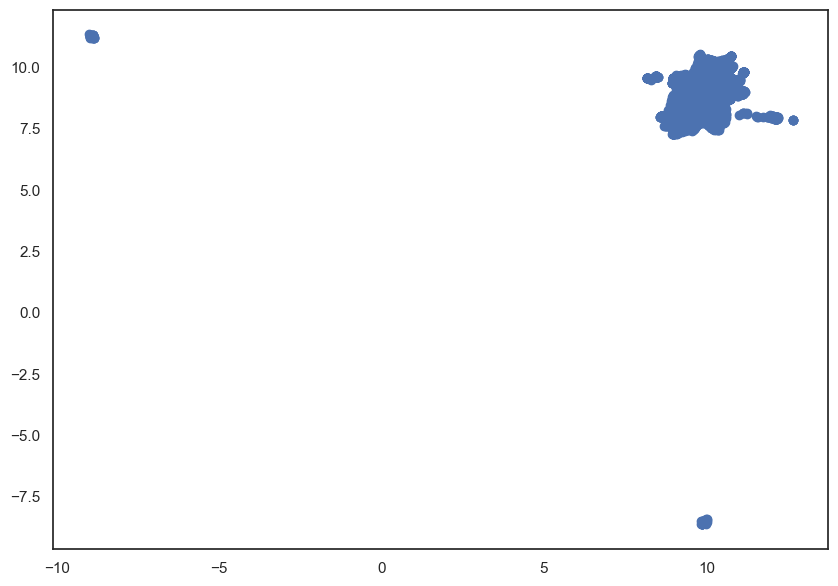

In [87]:
# visualize the results
# plot the first two dimensions
plt.scatter(umap_model[:,0], umap_model[:,1])
plt.show()

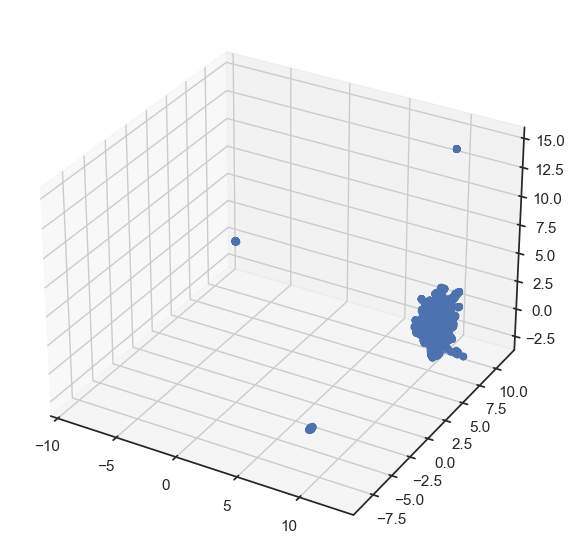

In [88]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(umap_model[:,0], umap_model[:,1], umap_model[:,2])
plt.show()

In [89]:
umap_model[0]

array([ 9.216641 ,  8.578399 , -1.0314525,  8.795795 ,  7.5039606,
        6.3406367], dtype=float32)

In [90]:
umap_model.shape

(47544, 6)

## HDBSCAN

> HDBSCAN is a density-based clustering algorithm that can discover clusters of varying shapes and sizes. It works by first computing the minimum spanning tree of the data, and then clustering the tree nodes based on their density.

In [ ]:
!pip install hdbscan

In [36]:
import hdbscan

In [102]:
# apply HDBSCAN to the sentence embeddings
hdbscan_ = hdbscan.HDBSCAN(min_cluster_size=50, 
                           metric="euclidean",
                           cluster_selection_method="eom",
                           algorithm="best",
                           prediction_data=True)

> In this code, min_cluster_size specifies the minimum number of points needed for a cluster to be formed, min_samples specifies the number of neighboring points needed for a point to be considered a core point, and metric specifies the distance metric used to measure the distance between points.

In [103]:
hdbscan_model = hdbscan_.fit_predict(sentence_embedding)

In [118]:
import pickle

# load the model
with open("/Users/deyna.baeva/Documents/code/embeddings/hdbscan_model_best.pkl", "rb") as file:
    hdbscan_model = pickle.load(file)

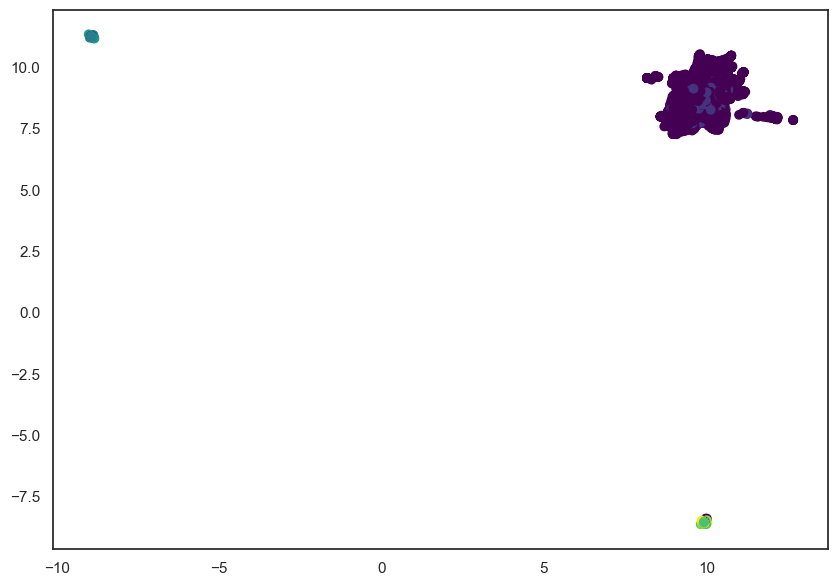

In [94]:
# visualize the results
plt.scatter(umap_model[:,0], umap_model[:,1], c=hdbscan_model, cmap="viridis")
plt.show()

> Points that are close together in the plot belong to the same cluster, while points that are far away belog to different clusters.

## CountVectorizer

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired

In [15]:
# tokenize topics
vectorizer_model = CountVectorizer()

In [16]:
# create topic representation
ctfidf_model = ClassTfidfTransformer()

### Key BERT

In [18]:
# fine-tune topic representations
representation_model = KeyBERTInspired(top_n_words=3)

In [19]:
sent = list(df["lemma_clean"])

> Reference: https://maartengr.github.io/BERTopic/algorithm/algorithm.html#code-overview 

In [21]:
# combine the steps
topic_model = BERTopic(
    language="multilingual",
    embedding_model = "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
    # umap_model=umap_, 
    # hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    ctfidf_model=ctfidf_model,
    representation_model=representation_model
)

In [22]:
topics, probs = topic_model.fit_transform(sent)

: 

: 

In [71]:
freq = topic_model.get_topic_info()
print("Number of topics: {}".format(len(freq)))
freq.head(10)

Number of topics: 250


,Topic,Count,Name
0,-1,25741,-1_boodschapp_boodschappen_melding_sturen
1,0,3214,0_email_mail_emailadres_melding
2,1,1442,1_terugbetalingsaanvraag_betaalverzoek_terugbe...
3,2,1076,2_kortingscode_kortingcode_code_servicecode
4,3,864,3_cancel_bestelling_ordernummer_vanochtend
5,4,821,4_cola_drinken_bier_drank
6,5,541,5_sturen_opgestuuren_boodschappen_opgestuurd
7,6,505,6_cheese_mozzarella_kaas_bedanken
8,7,432,7_brood_broodafdeling_eten_bakken
9,8,421,8_opvolgmelk_melkpak_melk_milk


In [ ]:
freq = topic_model.get_topic_info()
print("Number of topics: {}".format(len(freq)))
freq.head(10)

Number of topics: 290


,Topic,Count,Name
0,-1,24874,-1_boodschapp_boodschappen_melding_chat
1,0,1766,0_kortingscode_boodschapp_boodschappen_voucher
2,1,1093,1_cola_drinken_drank_alcohol
3,2,795,2_cancel_anuleren_ordernummer_bestelling
4,3,621,3_terugbetalen_terugbetaling_terugbetalingsaan...
5,4,541,4_winkel_winkelaankoop_winkelassortiment_online
6,5,516,5_cheese_mozzarella_kaasbrood_kaas
7,6,510,6_melkpak_melk_melkpoeder_milk
8,7,483,7_broodafdeling_brood_bakkerij_chat
9,8,434,8_boodschappen_melding_hoor_mee


In [ ]:
topic_model.save("paraphrase-multilingual-MiniLM-L12-v2-bert")

## BERTopic

In [ ]:
!pip install bertopic

In [21]:
sent = list(df["lemmatized"])

In [24]:
from bertopic import BERTopic

# Create a BERTopic model and fit it to the sentence embeddings
topic_model = BERTopic(language="multilingual", 
                       embedding_model="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2", 
                       calculate_probabilities=True, 
                       verbose=True, 
                       nr_topics=120,
                       umap_model=umap_)
topics, probs = topic_model.fit_transform(sent)

Batches: 100%|██████████| 1496/1496 [08:59<00:00,  2.77it/s]
2023-04-20 12:01:35,238 - BERTopic - Transformed documents to Embeddings
2023-04-20 12:01:49,276 - BERTopic - Reduced dimensionality


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2023-04-20 12:03:36,082 - BERTopic - Clustered reduced embeddings
2023-04-20 12:03:44,596 - BERTopic - Reduced number of topics from 237 to 120


In [ ]:
# load the saved model
model = BERTopic.load("/content/drive/MyDrive/BERTopic+embeddings/BERTopic/bert-model_v1")

In [38]:
freq = topic_model.get_topic_info()
print("Number of topics: {}".format(len(freq)))
freq.head(10)

Number of topics: 30


,Topic,Count,Name
0,-1,23625,-1_chat_bestelling_fijn_dag
1,0,18039,0_chat_fijn_dag_bestelling
2,1,889,1_annuleren_bestelling_order_number_morgen
3,2,848,2_helpen_mee_chat_sponsoring
4,3,676,3_brood_winkel_gaan_kopen
5,4,594,4_melk_yoghurt_pak_product
6,5,475,5_verjaardag_gebak_cadeaukaart_korting
7,6,451,6_koffie_aanbieding_koffiebon_koffiebonen
8,7,320,7_https_solliciteren_vacatures_nljobsjumbocomn...
9,8,300,8_fruit_banaan_groente_paprika


In [39]:
from scipy.cluster import hierarchy as sch
# Hierarchical topics
linkage_function = lambda x: sch.linkage(x, "single", optimal_ordering=True)
hierarchical_topics = topic_model.hierarchical_topics(sent, linkage_function=linkage_function)

100%|██████████| 28/28 [00:00<00:00, 229.19it/s]


In [40]:
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics, top_n_topics=30)

In [41]:
# Select most 3 similar topics
similar_topics, similarity = topic_model.find_topics("korting", top_n = 3)

In [42]:
most_similar = similar_topics[0]
print("Most Similar Topic Info: \n{}".format(topic_model.get_topic(most_similar)))
print("Similarity Score: {}".format(similarity[0]))

Most Similar Topic Info: 
[('annuleren', 0.2146011405541443), ('bestelling', 0.10330064114936599), ('order_number', 0.05728436875295825), ('morgen', 0.04365607650961275), ('chat', 0.031231813163861272), ('fijn', 0.02759010051621916), ('graag', 0.027020495392722308), ('bestelnummer', 0.025929085256463605), ('wens', 0.02529874327679888), ('bericht', 0.0251874801713679)]
Similarity Score: 0.7306993036778097


In [43]:
topic_model.topic_representations_

{-1: [('chat', 0.020448548274394383),
  ('bestelling', 0.018414173895101898),
  ('fijn', 0.017478403962193082),
  ('dag', 0.017156343643710093),
  ('graag', 0.017092583618011404),
  ('gaan', 0.016851273485195203),
  ('product', 0.016055017826316152),
  ('krijgen', 0.015256873926948267),
  ('wens', 0.015134144250168529),
  ('bericht', 0.015128912305938767)],
 0: [('chat', 0.021976372546833028),
  ('fijn', 0.018424526594311152),
  ('dag', 0.01835559922912186),
  ('bestelling', 0.018324781963690476),
  ('punt', 0.017314107688933312),
  ('graag', 0.016883998433550658),
  ('krijgen', 0.016211678553132405),
  ('bericht', 0.01611337841148158),
  ('wens', 0.01592150245174804),
  ('gaan', 0.015739238705918094)],
 1: [('annuleren', 0.2146011405541443),
  ('bestelling', 0.10330064114936599),
  ('order_number', 0.05728436875295825),
  ('morgen', 0.04365607650961275),
  ('chat', 0.031231813163861272),
  ('fijn', 0.02759010051621916),
  ('graag', 0.027020495392722308),
  ('bestelnummer', 0.025929085

In [44]:
topic_model.visualize_barchart()

In [45]:
topic_model.get_topic(2)

[('helpen', 0.20418788889887193),
 ('mee', 0.10045048066583989),
 ('chat', 0.0861240835880326),
 ('sponsoring', 0.052376076810892264),
 ('sponsoren', 0.03543692180267945),
 ('ondersteunen', 0.027174497181523493),
 ('honoreren', 0.02489326168693032),
 ('activiteit', 0.023518808717509335),
 ('school', 0.022561971280803082),
 ('doel', 0.02186441623070483)]

In [47]:
topic_model.get_topic(3)

[('brood', 0.1522023937736444),
 ('winkel', 0.02169527055124399),
 ('gaan', 0.018562112158303046),
 ('kopen', 0.017072478590800327),
 ('product', 0.01706581018050741),
 ('fijn', 0.0164111452846911),
 ('chat', 0.015747329153716544),
 ('recept', 0.015644228288047738),
 ('klacht', 0.015070330491926498),
 ('dag', 0.015011236457827927)]

In [48]:
# get top n topics and their associated keywords
n_topics = 10
topic_keywords = topic_model.get_topic(n_topics)

# print the top keywords for each topic
for topic in topic_keywords:
    print(topic)

('aardappel', 0.15263227292618284)
('zak', 0.043109781894919666)
('gratis', 0.02973916322998721)
('product', 0.028994974023315735)
('bestellen', 0.022066834918548797)
('terug', 0.02143402913830704)
('krijgen', 0.019092456712002184)
('chat', 0.018346191224375204)
('fijn', 0.018315709002766543)
('ontvangen', 0.01801636476172277)


In [49]:
topic_model.visualize_topics()

In [50]:
topic_model.visualize_heatmap()

In [52]:
topic_model.get_document_info(sent).head(30)

,Document,Topic,Name,Top_n_words,Probability,Representative_document
0,probleem bestelling melden ontvang vandaag mai...,-1,-1_chat_bestelling_fijn_dag,chat - bestelling - fijn - dag - graag - gaan ...,0.866653,False
1,heer mevrouw maand race auto ontvangen lang sn...,-1,-1_chat_bestelling_fijn_dag,chat - bestelling - fijn - dag - graag - gaan ...,0.404737,False
2,staan voedingswaarden vermelden fles wijn verk...,0,0_chat_fijn_dag_bestelling,chat - fijn - dag - bestelling - punt - graag ...,0.357058,False
3,[ORDER_NUMBER] servicecode invullen euro korti...,0,0_chat_fijn_dag_bestelling,chat - fijn - dag - bestelling - punt - graag ...,0.873839,False
4,bestelling ontvangen fles inleveren groot klei...,0,0_chat_fijn_dag_bestelling,chat - fijn - dag - bestelling - punt - graag ...,0.593755,False
5,possible conversation english made refund requ...,1,1_annuleren_bestelling_order_number_morgen,annuleren - bestelling - order_number - morgen...,0.674576,False
6,geven morgen dubbel betaling verleden week mor...,0,0_chat_fijn_dag_bestelling,chat - fijn - dag - bestelling - punt - graag ...,0.750730,False
7,proberen artikel bestelling voegen alweer app ...,0,0_chat_fijn_dag_bestelling,chat - fijn - dag - bestelling - punt - graag ...,0.597063,False
8,repen verkade bestellen leverbaar vanmiddag vo...,-1,-1_chat_bestelling_fijn_dag,chat - bestelling - fijn - dag - graag - gaan ...,0.551132,False
9,terug betaling ontvangen laat bericht week ver...,-1,-1_chat_bestelling_fijn_dag,chat - bestelling - fijn - dag - graag - gaan ...,0.259122,False


In [53]:
new_text = "problem with order"
topic, confidence = topic_model.transform([new_text])
print(f"Predicted topic: {topic[0]}, Confidence: {confidence[0]}")

Batches: 100%|██████████| 1/1 [00:00<00:00, 42.24it/s]
2023-04-19 11:54:12,949 - BERTopic - Reduced dimensionality
2023-04-19 11:54:12,986 - BERTopic - Calculated probabilities with HDBSCAN
2023-04-19 11:54:12,987 - BERTopic - Predicted clusters


Predicted topic: 0, Confidence: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
